## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools
import optuna
import pickle

import sklearn
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, \
    QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts

import yellowbrick

import posture_detector
from posture_detector.constants import columns

# Load

## Load Models

In [25]:
with open('../models/hyper_lda_clf.pkl', 'rb') as file:
    lda_clf = pickle.load(file)
with open('../models/hyper_ridge_clf.pkl', 'rb') as file:
    ridge_lf = pickle.load(file)

## Load Dataset


In [4]:
data_location = 'data/raw/datalog_at_2021-06-16_13_30_40.918525'

In [5]:
df_raw = pd.read_csv('../' + data_location)
df_raw.head()

,Ax,Ay,Az,Temperature,gx,gy,gz,FlexSensor,Label
0,-0.112305,-0.961426,-0.378906,28.5771,-5.40458,-2.099240,0.984733,524,NaN
1,-0.124023,-0.971436,-0.320801,28.5771,-4.09924,5.366410,3.786260,523,NaN
2,-0.141357,-0.984863,-0.328369,28.6712,-1.64885,3.435110,5.137400,523,NaN
3,-0.137451,-0.980469,-0.362305,28.6712,-4.61069,0.145038,1.641220,525,NaN
4,-0.140869,-0.978027,-0.361572,28.6712,-3.43511,1.206110,1.694660,525,NaN


# Prepared Dataset

In [8]:
df = posture_detector.data.parse_unlabelled_dataset(df_raw)
df.head()

,Ax,Ay,Az,gx,gy,gz,FlexSensor
12002,0.263428,-0.787354,-0.749756,5.54962,-17.297700,-16.938900,522
12003,0.278564,-0.848145,-0.714111,1.96183,-4.702290,-6.251910,522
12004,0.299561,-0.852295,-0.675537,-1.45038,-0.221374,0.244275,522
12005,0.283203,-0.860107,-0.654297,-3.25954,-3.984730,1.793890,523
12006,0.291016,-0.858154,-0.707275,-2.64122,-5.030530,-2.122140,523


# Plot

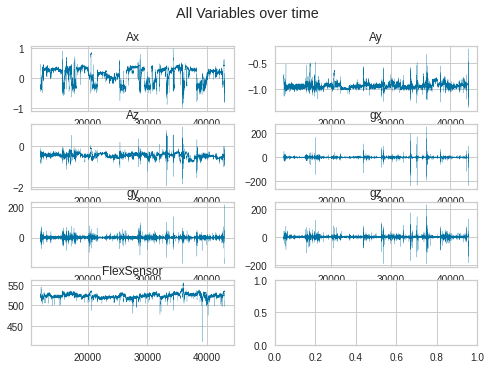

In [22]:

figure, axis = plt.subplots(4, 2)
cols = [
    columns.Record.Ax,
    columns.Record.Ay,
    columns.Record.Az,
    columns.Record.Gx,
    columns.Record.Gy,
    columns.Record.Gz,
    columns.Record.Flex,
]

for ax, col in zip(axis.flat, cols):
    ax.plot(df.index, df[col].values, lw=.2)
    ax.set_title(col)
plt.suptitle('All Variables over time')
plt.show()

In [30]:
y_lda = lda_clf.predict(df)

In [31]:
y_ridge = ridge_lf.predict(df)

# Plot Classifications for Unlabeled Data

In [ ]:
cols = [
    columns.Record.Ax,
    columns.Record.Ay,
    columns.Record.Az,
    columns.Record.Gx,
    columns.Record.Gy,
    columns.Record.Gz,
    columns.Record.Flex,
]

# LDA Classifications

In [ ]:
df['Label'] = y_lda
df['Label'].unique()

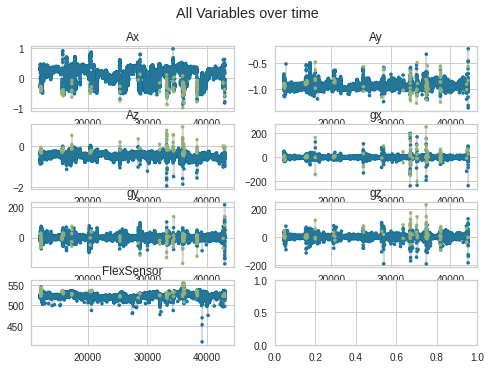

In [43]:
figure, axis = plt.subplots(4, 2)

for ax, col in zip(axis.flat, cols):
    posture_detector.viz.plot_positions_from_df(
        df, [1, 0], col, ax
    )
    ax.set_title(col)
plt.suptitle('All Variables over time')
plt.show()

# Ridge Classifications

In [47]:
df['Label'] = y_ridge
df['Label'].unique()

array([1, 0])

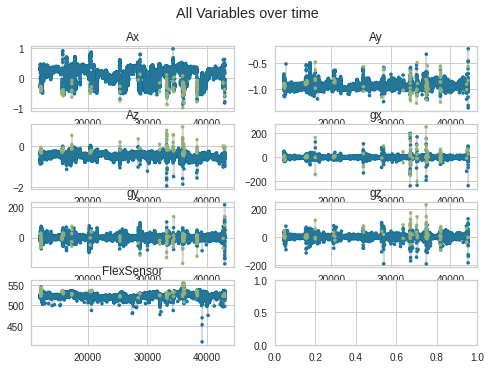

In [48]:
figure, axis = plt.subplots(4, 2)

for ax, col in zip(axis.flat, cols):
    posture_detector.viz.plot_positions_from_df(
        df, [1, 0], col, ax
    )
    ax.set_title(col)
plt.suptitle('All Variables over time')
plt.show()